To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Max-Flow Min-Cut Problem

In this tutorial, the Python library "NetworkX" is required to solve the max-flow min-cut problem. 

In [2]:
import numpy as np
import networkx as nx

# Problem 01

A transportation company wants to invest in its infrastructure to increase the resilience of its transportation system. In particular, negative feedback was received from passengers who wanted to set off from point A and reach point F about the inadequacy of the transportation system during busy times. The company is looking for a way to solve this problem. For this purpose, a number of directed paths from A to F are identified. Information on the transportation network, including residual (excluding flows from A to F) line capacities during busy times, is summarized below:

| From |  To | Capacity |
| :--: | :-: | :------: |
| A | B | 30 |
| A | C | 40 | 
| B | C | 65 |
| B | D | 25 |
| C | D | 10 |
| D | E | 35 |
| E | F | 20 |
| D | F | 30 |

The Python library "NetworkX" supports directed graphs with self loops through the class DiGraph.

In [3]:
G1 = nx.DiGraph()
G1.add_nodes_from([
    ("A", {"color": "black"}),
    ("B", {"color": "black"}),
    ("C", {"color": "black"}),
    ("D", {"color": "black"}),
    ("E", {"color": "black"}),
    ("F", {"color": "black"}),
])

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [4]:
nodepos = {
    "A":np.array([0.0,0.0]),
    "B":np.array([-1.0,1.0]),
    "C":np.array([0.0,2.0]),
    "D":np.array([-1.0,3.0]),
    "E":np.array([-1.0,4.0]),
    "F":np.array([0.0,5.0])
}

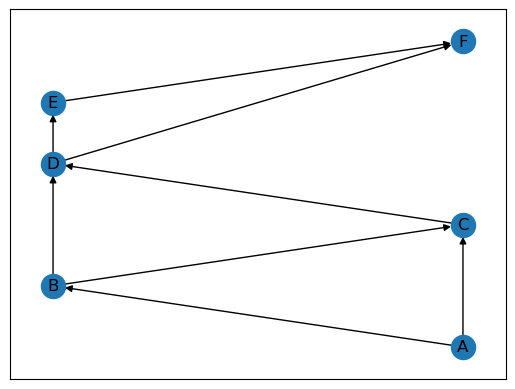

In [5]:
elist = [("A", "B"),
         ("A", "C"),
         ("B", "C"),
         ("B", "D"),
         ("C", "D"),
         ("D", "E"),
         ("E", "F"),
         ("D", "F")]
G1.add_edges_from(elist)
eattrs = {("A", "B"): {"capacity": 30}, 
          ("A", "C"): {"capacity": 40}, 
          ("B", "C"): {"capacity": 65}, 
          ("B", "D"): {"capacity": 25},
          ("C", "D"): {"capacity": 10}, 
          ("D", "E"): {"capacity": 35}, 
          ("E", "F"): {"capacity": 20}, 
          ("D", "F"): {"capacity": 30}}
nx.set_edge_attributes(G1, eattrs)
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
#nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'weight'), label_pos = 0.5, verticalalignment = 'bottom')

To get information on the graph "G1":

In [6]:
print(G1)

DiGraph with 6 nodes and 8 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [7]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 1)	1
  (0, 2)	1
  (1, 2)	1
  (1, 3)	1
  (2, 3)	1
  (3, 4)	1
  (3, 5)	1
  (4, 5)	1


To have the adjacency matrix of the graph "G1" in dense form:

In [8]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[0 1 1 0 0 0]
 [0 0 1 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]


In [9]:
cut_value, partition = nx.minimum_cut(G1, "A", "F")

In [10]:
V1, V2 = partition
print(V1)
print(V2)

{'C', 'B', 'A'}
{'D', 'E', 'F'}


In [11]:
for e in G1.edges:
    if((e[0] in V1)and(e[1] in V2)):
        print(e)

('B', 'D')
('C', 'D')


In [12]:
print(cut_value)

35


It appears that the two lines, namely "B-D"(with available capacity 25) and "C-D"(with available capacity 10) constitute a bottleneck. As a solution to this problem, the idea of increasing the capacity of the "C-D" line by 50% is being discussed.

In [13]:
nx.set_edge_attributes(G1, {("C", "D"): {"capacity": 15}})

In [14]:
cut_value, partition = nx.minimum_cut(G1, "A", "F")

In [15]:
V1, V2 = partition
print(V1)
print(V2)

{'C', 'B', 'A'}
{'D', 'E', 'F'}


In [16]:
for e in G1.edges:
    if((e[0] in V1)and(e[1] in V2)):
        print(e)

('B', 'D')
('C', 'D')


In [17]:
print(cut_value)

40


As a result of the capacity increase, it is possible to achieve some improvement in the transportation system during busy times.